In [1]:
                         #   Bibliothèques

# Pandas pour la manipulation de données sous forme de DataFrame
import pandas as pd

# NumPy pour les opérations mathématiques et les calculs sur les matrices
import numpy as np

# Matplotlib pour la création de graphiques
import matplotlib.pyplot as plt

# Seaborn pour les visualisations de données basées sur Matplotlib
import seaborn as sns

# Scikit-learn pour la modélisation et la manipulation des jeux de données
from sklearn.model_selection import train_test_split   # Pour diviser les données en ensembles d'entraînement et de test
from sklearn.preprocessing import StandardScaler, OneHotEncoder   # Pour normaliser les données et encoder les variables catégorielles
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix  # Pour évaluer les modèles

# Algorithmes de modélisation à utiliser dans notre projet
from sklearn.linear_model import LogisticRegression   # Régression logistique pour les prédictions binaires
from sklearn.ensemble import RandomForestClassifier   # Forêt aléatoire pour des prédictions plus complexes
from sklearn.neural_network import MLPClassifier   # Réseaux de neurones pour la modélisation avancée

In [2]:
                            # Chargement des données
# Charger le dataset à partir du fichier CSV (les données doivent être dans le bon répertoire ou fournir le chemin correct)
df= pd.read_csv(r'C:\Users\hp\Projet_ML\Churn_Modelling.csv')
# Afficher les premières lignes du DataFrame pour comprendre la structure des données
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [3]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
                        # Nettoyage des données
# Vérifier les valeurs manquantes dans les colonnes pour détecter des anomalies dans les données
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [7]:
print(df.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [6]:
# Nettoyer les noms de colonnes en supprimant les espaces invisibles
df.columns = df.columns.str.strip()

In [16]:
# Ensuite, essaie d'appliquer l'encodage
df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender','Surname'], drop_first=True)
df_encoded=df_encoded.astype(int)
df_encoded

RowNumber  CustomerId  CreditScore  Age  Tenure  Balance  NumOfProducts  \
0             1    15634602            0    0       2       -1              1   
1             2    15647311            0    0       1        0              1   
2             3    15619304           -1    0       8        1              3   
3             4    15701354            0    0       1       -1              2   
4             5    15737888            2    0       2        0              1   
...         ...         ...          ...  ...     ...      ...            ...   
9995       9996    15606229            1    0       5       -1              2   
9996       9997    15569892           -1    0      10        0              1   
9997       9998    15584532            0    0       7       -1              1   
9998       9999    15682355            1    0       3        0              2   
9999      10000    15628319            1   -1       4        0              1   

      HasCrCard  IsActiveMember  EstimatedSalary  ...  Surname_Zinachukwudi  \
0             1               1                0  ...                     0   
1             0               1                0  ...                     0   
2             1               0                0  ...                     0   
3             0               0                0  ...                     0   
4             1               1                0  ...                     0   
...         ...             ...              ...  ...                   ...   
9995          1               0                0  ...                     0   
9996          1               1                0  ...                     0   
9997          0               1               -1  ...                     0   
9998          1               0                0  ...                     0   
9999          1               0               -1  ...                     0   

      Surname_Zito  Surname_Zotov  Surname_Zotova  Surname_Zox  \
0                0              0               0            0   
1                0              0               0            0   
2                0              0               0            0   
3                0              0               0            0   
4                0              0               0            0   
...            ...            ...             ...          ...   
9995             0              0               0            0   
9996             0              0               0            0   
9997             0              0               0            0   
9998             0              0               0            0   
9999             0              0               0            0   

      Surname_Zubarev  Surname_Zubareva  Surname_Zuev  Surname_Zuyev  \
0                   0                 0             0              0   
1                   0                 0             0              0   
2                   0                 0             0              0   
3                   0                 0             0              0   
4                   0                 0             0              0   
...               ...               ...           ...            ...   
9995                0                 0             0              0   
9996                0                 0             0              0   
9997                0                 0             0              0   
9998                0                 0             0              0   
9999                0                 0             0              0   

      Surname_Zuyeva  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
9995               0  
9996               0  
9997               0  
9998               0  
9999               0  

[10000 rows x 2945 columns]

In [10]:
print(df.columns)


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [11]:
# Normalisation des colonnes numériques
scaler = StandardScaler()
columns_to_scale = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
df_encoded[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])
df_encoded[columns_to_scale]

CreditScore       Age   Balance  EstimatedSalary
0       -0.326221  0.293517 -1.225847         0.021880
1       -0.440036  0.198164  0.117342         0.216532
2       -1.536794  0.293517  1.333050         0.240686
3        0.501521  0.007457 -1.225847        -0.108920
4        2.063884  0.388871  0.785723        -0.365269
...           ...       ...       ...              ...
9995     1.246488  0.007457 -1.225847        -0.066422
9996    -1.391939 -0.373958 -0.306384         0.027983
9997     0.604988 -0.278604 -1.225847        -1.008645
9998     1.256835  0.293517 -0.022607        -0.125231
9999     1.463771 -1.041433  0.859960        -1.076375

[10000 rows x 4 columns]

In [12]:
# Encodage des variables catégorielles : Convertir les colonnes non numériques en variables numériques pour la modélisation
df_encoded = pd.get_dummies(df, drop_first=True)
# Normalisation des données : Mettre à l'échelle les variables numériques pour qu'elles aient une moyenne de 0 et un écart type de 1
scaler = StandardScaler()
# Liste des colonnes numériques à normaliser (ces variables peuvent avoir des écarts importants qui influencent la performance des modèles)
columns_to_scale = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
# Appliquer la normalisation à ces colonnes
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df[columns_to_scale]
df_encoded=df_encoded.astype(int)
df_encoded

RowNumber  CustomerId  CreditScore  Age  Tenure  Balance  NumOfProducts  \
0             1    15634602          619   42       2        0              1   
1             2    15647311          608   41       1    83807              1   
2             3    15619304          502   42       8   159660              3   
3             4    15701354          699   39       1        0              2   
4             5    15737888          850   43       2   125510              1   
...         ...         ...          ...  ...     ...      ...            ...   
9995       9996    15606229          771   39       5        0              2   
9996       9997    15569892          516   35      10    57369              1   
9997       9998    15584532          709   36       7        0              1   
9998       9999    15682355          772   42       3    75075              2   
9999      10000    15628319          792   28       4   130142              1   

      HasCrCard  IsActiveMember  EstimatedSalary  ...  Surname_Zotova  \
0             1               1           101348  ...               0   
1             0               1           112542  ...               0   
2             1               0           113931  ...               0   
3             0               0            93826  ...               0   
4             1               1            79084  ...               0   
...         ...             ...              ...  ...             ...   
9995          1               0            96270  ...               0   
9996          1               1           101699  ...               0   
9997          0               1            42085  ...               0   
9998          1               0            92888  ...               0   
9999          1               0            38190  ...               0   

      Surname_Zox  Surname_Zubarev  Surname_Zubareva  Surname_Zuev  \
0               0                0                 0             0   
1               0                0                 0             0   
2               0                0                 0             0   
3               0                0                 0             0   
4               0                0                 0             0   
...           ...              ...               ...           ...   
9995            0                0                 0             0   
9996            0                0                 0             0   
9997            0                0                 0             0   
9998            0                0                 0             0   
9999            0                0                 0             0   

      Surname_Zuyev  Surname_Zuyeva  Geography_Germany  Geography_Spain  \
0                 0               0                  0                0   
1                 0               0                  0                1   
2                 0               0                  0                0   
3                 0               0                  0                0   
4                 0               0                  0                1   
...             ...             ...                ...              ...   
9995              0               0                  0                0   
9996              0               0                  0                0   
9997              0               0                  0                0   
9998              0               0                  1                0   
9999              0               0                  0                0   

      Gender_Male  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
9995            1  
9996            1  
9997            0  
9998            1  
9999            0  

[10000 rows x 2945 columns]

<Axes: >

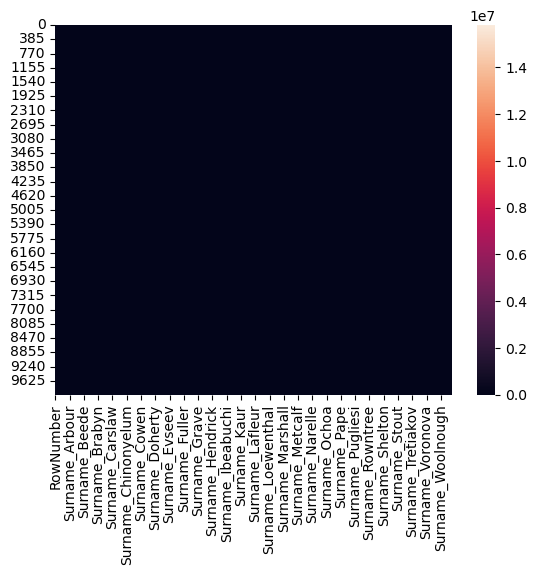

In [13]:
sns.heatmap(df_encoded)

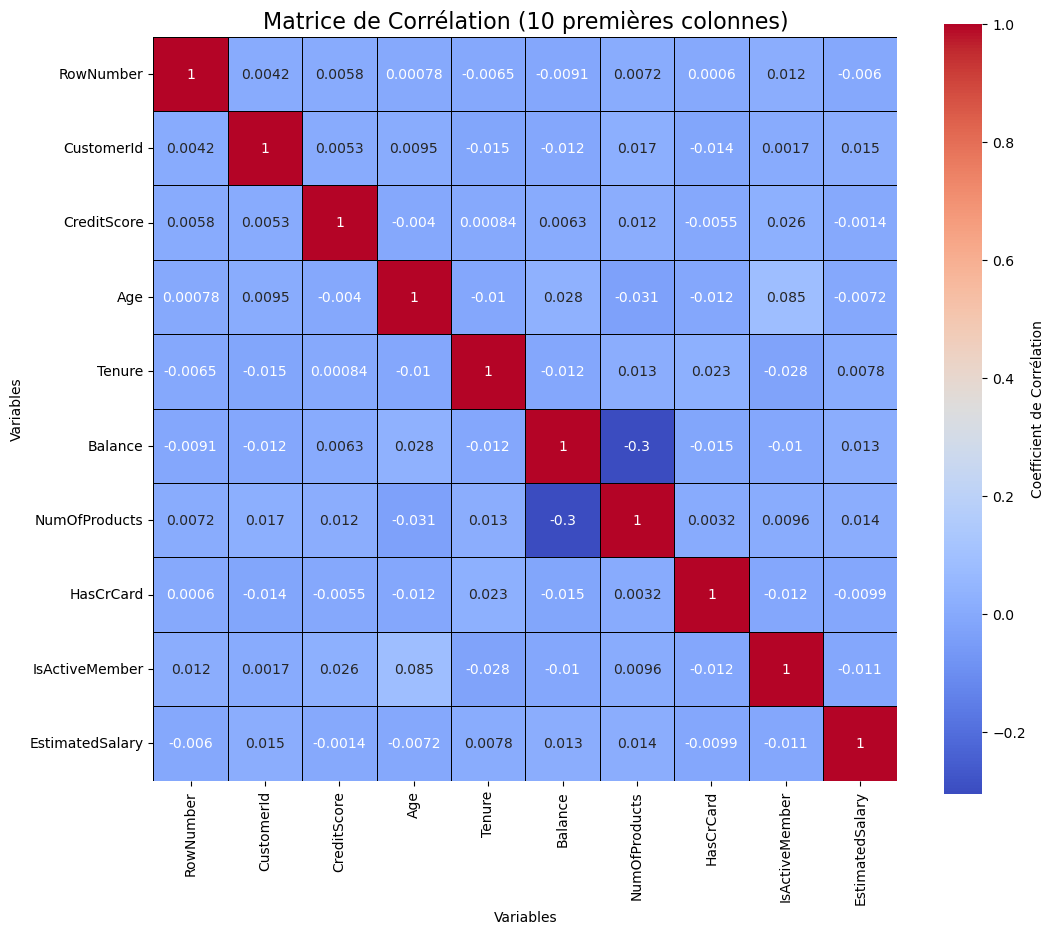

In [14]:
# Limiter le nombre de colonnes à inclure dans la heatmap (exemple avec les 10 premières colonnes)
correlation_matrix = df_encoded.iloc[:, :10].corr()

# Taille de la figure
plt.figure(figsize=(12, 10))

# Création de la heatmap pour les 10 premières colonnes
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            linewidths=0.5, 
            linecolor='black', 
            cbar_kws={'label': 'Coefficient de Corrélation'}, 
            square=True)

plt.title('Matrice de Corrélation (10 premières colonnes)', fontsize=16)
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()


In [15]:
sns.pairplot(df, hue='Surname')

In [ ]:
# Calcul de la matrice de corrélation pour toutes les colonnes
correlation_matrix = df_encoded.corr()

# Taille de la figure
plt.figure(figsize=(12, 10))

# Création de la heatmap sans annotations
sns.heatmap(correlation_matrix, 
            annot=False,           # Désactiver les annotations pour accélérer le rendu
            cmap='coolwarm', 
            linewidths=0.5, 
            linecolor='black', 
            cbar_kws={'label': 'Coefficient de Corrélation'}, 
            square=True)

plt.title('Matrice de Corrélation (sans annotations)', fontsize=16)
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()


In [ ]:
                  # Exploration des données
# Calcul de la matrice de corrélation
correlation_matrix = df_encoded.corr()

# Taille de la figure
plt.figure(figsize=(12, 10))

# Création de la heatmap pour la matrice de corrélation
sns.heatmap(correlation_matrix, 
            annot=True,            # Affiche les valeurs de corrélation dans les cellules
            cmap='coolwarm',       # Palette de couleurs contrastée
            linewidths=0.5,        # Lignes entre cellules
            linecolor='black',     # Couleur des lignes entre cellules
            cbar_kws={'label': 'Coefficient de Corrélation'},  # Label pour la barre de couleurs
            square=True)           # Assurer des cellules carrées

# Ajouter un titre et des labels
plt.title('Matrice de Corrélation', fontsize=16)
plt.xlabel('Variables')
plt.ylabel('Variables')

# Afficher la heatmap
plt.show()

In [ ]:
                        # Separation du jeu de donnés
# Séparer les variables indépendantes (features) et la variable cible (target) 'Exited' qui indique si un client a churn ou non
X = df_encoded.drop(['Exited'], axis=1)  # X contient toutes les colonnes sauf 'Exited'
y = df_encoded['Exited']  # y contient la colonne 'Exited' qui sera la variable prédictive

# Diviser les données en ensembles d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

                    # Modélisation des données
# Modèle de régression logistique
log_model = LogisticRegression()
log_model.fit(X_train, y_train)  # Entraîner le modèle avec les données d'entraînement
y_pred_log = log_model.predict(X_test)  # Prédire sur les données de test

# Modèle Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)  # Entraîner le modèle avec les données d'entraînement
y_pred_rf = rf_model.predict(X_test)  # Prédire sur les données de test

# Modèle de réseau de neurones
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)  # Configurer un réseau de neurones avec deux couches cachées
mlp_model.fit(X_train, y_train)  # Entraîner le modèle
y_pred_mlp = mlp_model.predict(X_test)  # Prédire sur les données de test


In [ ]:
                           #  Evaluation du modèle
# Fonction d'évaluation des modèles : renvoie les métriques d'accuracy, précision, rappel et F1-score
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)  # Calcul de l'accuracy
    precision = precision_score(y_test, y_pred)  # Calcul de la précision
    recall = recall_score(y_test, y_pred)  # Calcul du rappel
    f1 = f1_score(y_test, y_pred)  # Calcul du F1-score
    return accuracy, precision, recall, f1

# Évaluer chaque modèle (régression logistique, Random Forest et réseau de neurones)
results = {}
results['Logistic Regression'] = evaluate_model(y_test, y_pred_log)
results['Random Forest'] = evaluate_model(y_test, y_pred_rf)
results['Neural Network'] = evaluate_model(y_test, y_pred_mlp)

# Afficher les résultats
print(results)
